# Feature Selection

Feature selection is the process of selecting a subset of relevant features for use in model construction


## Top reasons to use feature selection are:
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

***Import the packages we will use for this notebook***

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")



***Set up or initial dataframe by removing variable and transforming others.***

In [2]:
df = pd.read_csv('resources/cleaned_movie_data.csv', index_col=0)

In [3]:
df.isnull().mean()

color                        0.000481
director_name                0.000241
num_critic_for_reviews       0.000722
duration                     0.000481
director_facebook_likes      0.000241
actor_3_facebook_likes       0.003127
actor_2_name                 0.001443
actor_1_facebook_likes       0.000962
gross                        0.000000
genres                       0.000000
actor_1_name                 0.000962
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.003127
facenumber_in_poster         0.001684
movie_imdb_link              0.000000
num_user_for_reviews         0.000241
language                     0.000722
country                      0.000000
content_rating               0.015396
budget                       0.000000
title_year                   0.000241
actor_2_facebook_likes       0.001443
imdb_score                   0.000000
movie_facebook_likes         0.000000
rating      

In [4]:
df.drop(columns=['color', 'director_name','actor_2_name','language', 'country',
                 'movie_imdb_link', 'movie_title', 'num_voted_users', 
                 'movie_facebook_likes','actor_1_name', 'actor_3_name',
                 'content_rating', 'rating', 'genres'], 
                 axis =1, inplace=True)

In [5]:
df.columns


Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'G', 'Other', 'PG', 'PG-13',
       'R'],
      dtype='object')

In [6]:
df['yr_old'] =  df['title_year'].map(lambda x: 2016-x )

df = df[df['yr_old']<20]

df = df[df['budget']<300000000]

df = df[(df['gross']>1000000) & (df['gross']<500000000)]

In [7]:

df['gross_log'] = np.log(df['gross'])
df['gross_sqrt'] = np.sqrt(df['gross'])

In [8]:
cols  = ['duration','director_facebook_likes', 'actor_3_facebook_likes', 
       'actor_1_facebook_likes', 'gross', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget'
       ]

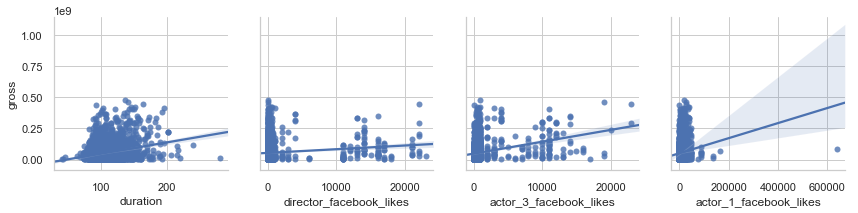

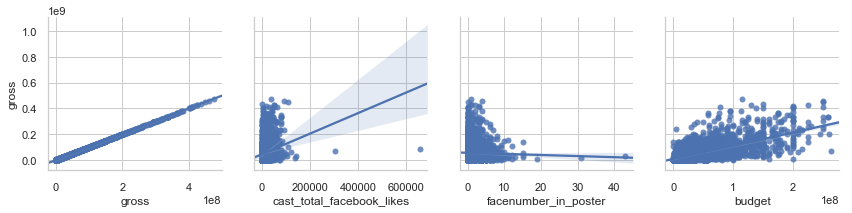

In [10]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

In [11]:
feature_columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'G', 'PG', 'PG-13',
       'R']

In [12]:
target = df['gross_sqrt']
features = df[feature_columns]


In [13]:
features.isnull().mean()

num_critic_for_reviews       0.000000
duration                     0.000341
director_facebook_likes      0.000000
actor_3_facebook_likes       0.001365
actor_1_facebook_likes       0.000000
cast_total_facebook_likes    0.000000
facenumber_in_poster         0.002048
num_user_for_reviews         0.000000
budget                       0.000000
title_year                   0.000000
actor_2_facebook_likes       0.000341
imdb_score                   0.000000
G                            0.000000
PG                           0.000000
PG-13                        0.000000
R                            0.000000
dtype: float64

In [14]:
features.fillna(features.mean(), inplace=True)

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=23,test_size=0.2)


In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=feature_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=feature_columns)

In [17]:
X_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,G,PG,PG-13,R
0,-0.623742,-0.620235,-0.231405,-0.394896,-0.439447,-0.545289,-0.654851,-0.601588,-0.893369,-0.458785,-0.427584,1.407884,-0.157872,-0.409771,1.214572,-0.851350
1,1.930626,1.043410,-0.140241,-0.050825,1.432496,2.119437,1.148250,0.020968,-0.384003,1.594558,4.131495,1.313567,-0.157872,-0.409771,-0.823335,1.174604
2,0.515149,1.900439,-0.240170,-0.098317,-0.123471,-0.180699,-0.204076,3.308252,-0.678304,-1.018787,-0.267816,1.502202,-0.157872,-0.409771,-0.823335,1.174604
3,0.547688,0.488861,-0.205458,-0.045495,0.395185,0.248009,0.246699,0.447796,-0.565111,0.101218,-0.278958,1.124931,-0.157872,-0.409771,-0.823335,1.174604
4,-1.111837,-0.166514,-0.181615,-0.094925,-0.413572,-0.352842,2.951351,-0.771376,-0.474557,1.407890,-0.284131,-0.667104,-0.157872,-0.409771,1.214572,-0.851350


In [18]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

y_pred = lm.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

NameError: name 'y_train_pred' is not defined

In [19]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

***Plot the residuals after fitting a linear model***

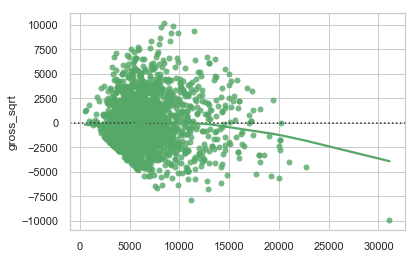

In [20]:

sns.residplot(y_train_pred, y_train, lowess=True, color="g")

### Based on this residual plot how might we want to transform our data?

## Types of Feature Selection

* Filter Methods
* Wrapper Methods
* Embedded Methods

# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

![alt text](./resources/Filter_1.png)

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](./resources/FS1.webp)

### Removing Variables based on correlation coefficient

In [ ]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

In [ ]:

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
len(X_train.columns)

In [ ]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)


In [ ]:
len(X_train.columns)

In [ ]:
X_train.corrwith(y_train).abs()


## Variance Inflation Factor (VIF) 

VIFis a measure of colinearity among predictor variables within a multiple regression. The variance inflation factor for the estimated regression coefficient $b_j$ — denoted $VIF_j$ —is just the factor by which the variance of $b_j$ is "inflated" by the existence of correlation among the predictor variables in the model.In particular, the variance inflation factor for the jth predictor is:

$$VIF_j=\frac{1}{1-R_{j}^{2}}$$


where $R^2_j$  is the $R^2$-value obtained by regressing the jth predictor on the remaining predictors. 


Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

https://online.stat.psu.edu/stat462/node/180/

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

###  F Test

F Test is a statistical test used to compare between models and check if the difference is significant between the model.

F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.

The least square errors in both the models are compared and checks if the difference in errors between model X and Y are significant or introduced by chance.

F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.

Scikit learn provides the Selecting K best features using F-Test.

***I am using the F-test to select the 10 top varaibles for this model***

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

In [ ]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [ ]:
list(removed_columns)

In [ ]:
list(selected_columns)

In [ ]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_pred = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', int(test_rmse), "vs. KBest: ", int(testK_rmse))

# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model is used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

Wrapper Methods promises you a best set of features with a extensive greedy search.

But the main drawbacks of wrapper methods is the sheer amount of models that needs to be trained. It is computationally very expensive and is infeasible with large number of features.



![alt text](./resources/Wrapper_1.webp)

### Recursive Feature Elimination

An example if a wrapper method is the recursive feature elimination algorithm.

As the name suggests, this method eliminates worst performing features on a particular model one after the other until the best subset of features are known.


Recursive elimination eliminates the least explaining features one after the other.
For data with n features,

- On first round ‘n-1’ models are created with combination of all features except one. The least performing feature is removed

- On second round ‘n-2’ models are created by removing another feature.



<img src='./resources/rfe_graph.png' width=500/>

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
ols = linear_model.LinearRegression()

In [ ]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



In [ ]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]


In [ ]:
list(removed_columns)

In [ ]:
len(list(selected_columns))

In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_columns], y_train)

trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred = lm_rfe.predict(X_test[selected_columns])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', int(test_rmse), "vs. KBest: ", int(testK_rmse), "vs. RFE: ", int(testRFE_rmse))

# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](./resources/Embedded_1.webp)

***Now we will create polynomial and interaction terms***

***Now we will scale those terms***

In [ ]:

X_train.head()

***Plot to compare the size of all of our coefficients***

In [ ]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = feature_columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [ ]:
coef.T

In [ ]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )




In [ ]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [ ]:
lasso_coef01.T

In [ ]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [ ]:
lasso_coef01.T